<a href="https://colab.research.google.com/github/zerobridge/MLPerfectGuide/blob/main/%E2%93%93_%ED%8C%8C%EC%9D%B4%EC%8D%AC_ML_%EC%99%84%EB%B2%BD%EA%B0%80%EC%9D%B4%EB%93%9C_%5B9~10%5D_%EC%B6%94%EC%B2%9C%EC%8B%9C%EC%8A%A4%ED%85%9C_%EC%8B%9C%EA%B0%81%ED%99%94_v0_11_230326.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **[09] 추천시스템**

### **01. 추천 시스템의 개요와 배경**

#### **(1) 추천 시스템의 개요**

**▶ 추천 시스템의 중요성**

- e-commerce의 필수 요소
- 주의깊게 봐야할 추천 엔진 : 유튜브

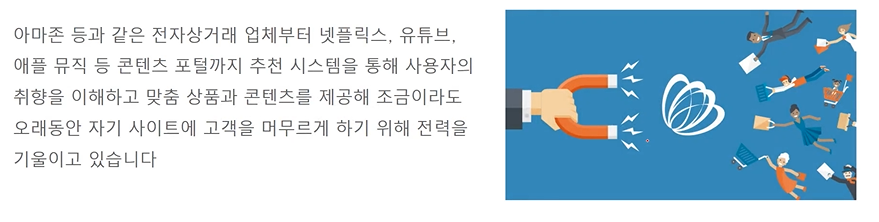

**▶ 사용자에게 맞춤 콘텐츠를 제공**

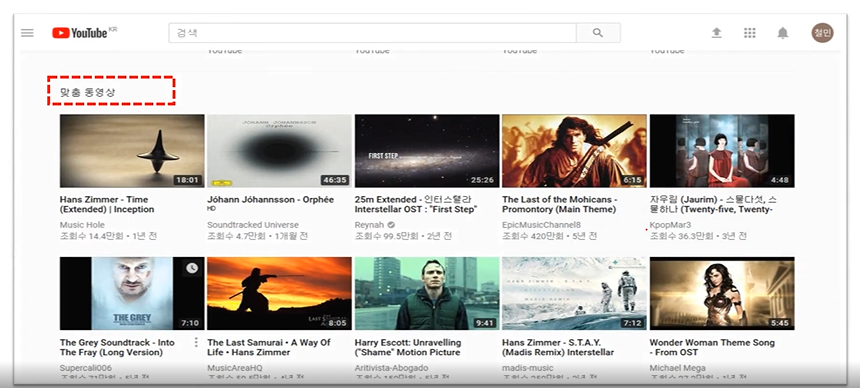

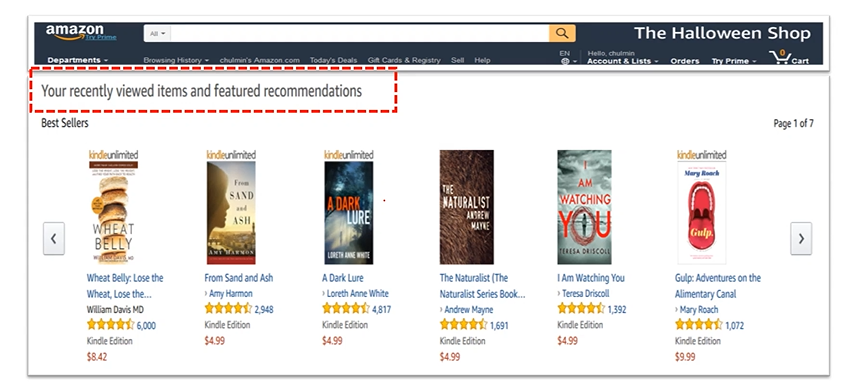

#### **(2) 온라인 스토어의 필수 요소, 추천 시스템**

**▶ 추천엔진의 필요성**

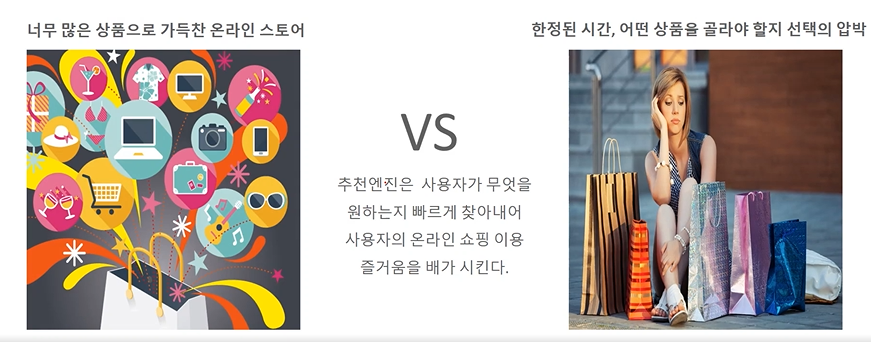

**▶ 추천엔진을 통한 사용자의 취향 저격**

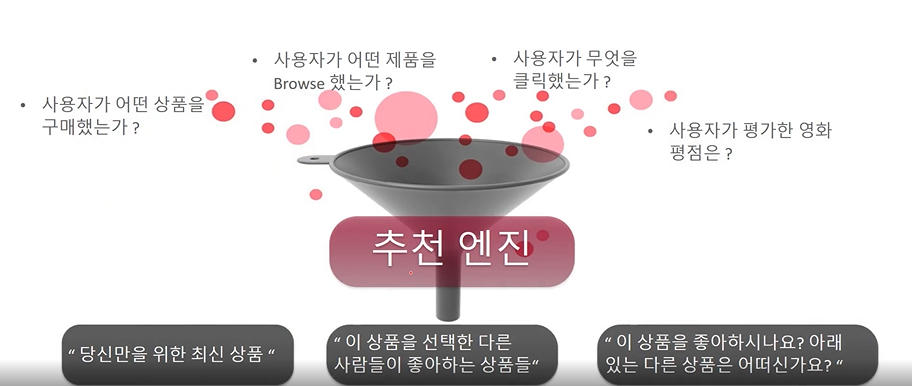

- 각 유저들의 웹행동 히스토리를 취합하여 추천엔진에 활용한다.

**▶ 추천 시스템의 묘미**

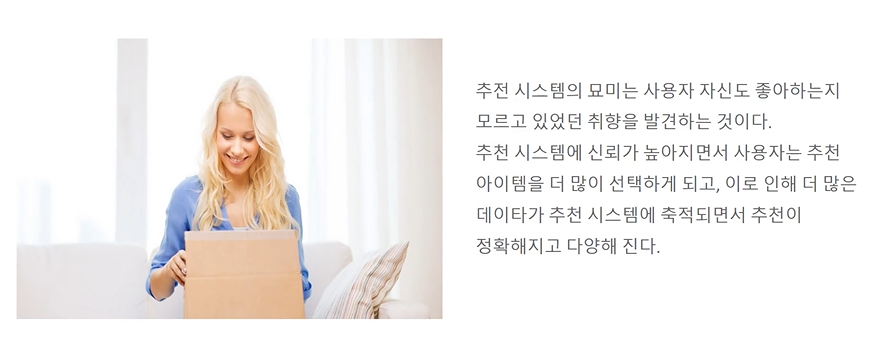

**▶ 추천이 지배하는 사회**

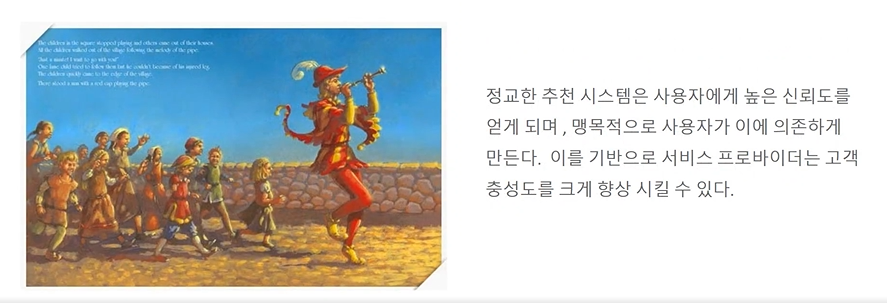

#### **(3) 추천시스템의 유형**

**▶ 추천 시스템 방식**

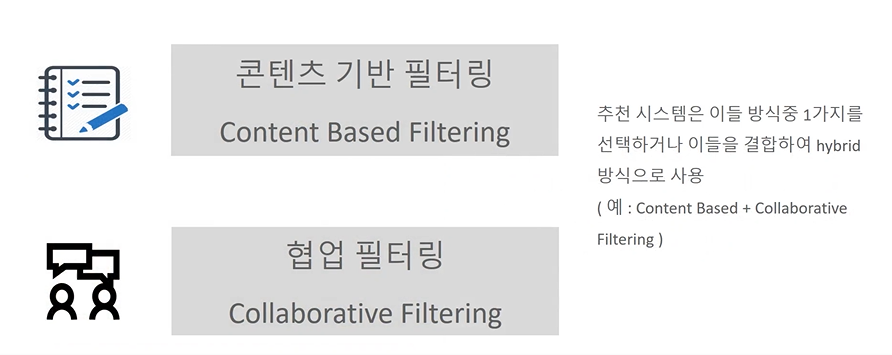

**▶ 하이브리드 기반 추천**

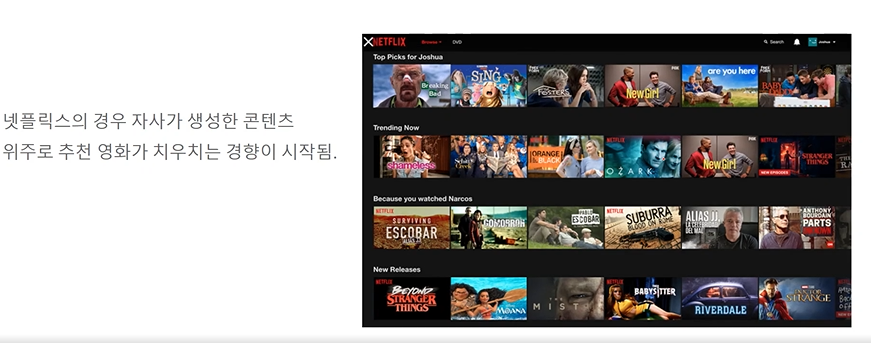

- 물론 넷플릭스는 오리지널 콘텐츠들에 가중치를 좀 더 주기도 함

### **02. 콘텐츠 기반 필터링 추천 시스템**

- 콘텐츠 기반 필터링 방식 : 사용자가 특정한 아이템을 매우 선호하는 경우, 그 아이템과 비슷한 콘텐츠를 가진 다른 아이템을 추천하는 방식

**▶ 콘텐츠 기반 필터링 - Contents Based Filtering**

- 사용자가 특정 영화에 높은 평점을 줬다면 그 영화의 장르, 출연배우, 감독, 영화 키워드 등의 콘텐츠와 유사한 다른 영화를 추천

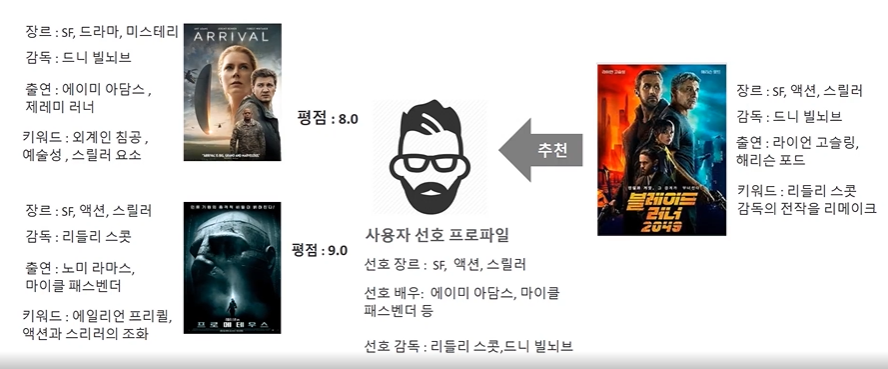

**▶ 콘텐츠 기반 필터링 기법**

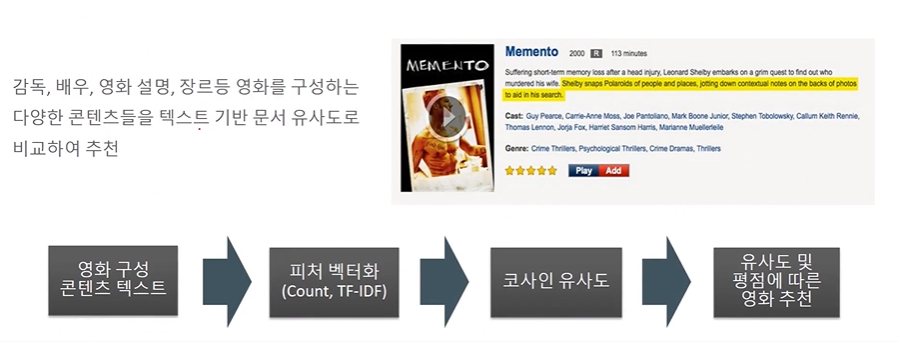

- 문제점 : 지나치게 마케팅적인 메세지에 영향을 받음
- 그래도 요즘도 꽤 자주 쓰임

### **[실습] 05. 콘텐츠 기반 필터링 실습 - TMDB 5000 영화 데이터 세트**

**▶ 콘텐츠 기반 필터링 실습**

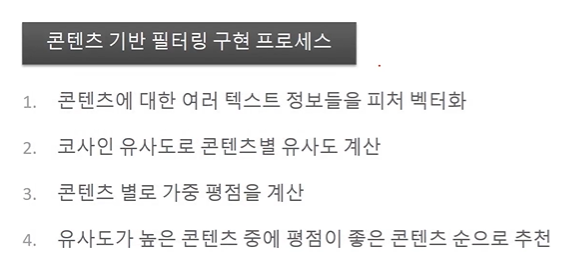

- 데이터셋 url : https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata


#### **(1) 장르 속성을 이용한 영화 콘텐츠 기반 필터링**

#### **(2) 데이터 로딩 및 가공**

In [1]:
import pandas as pd
import numpy as np
import warnings; warnings.filterwarnings('ignore')

movies =pd.read_csv('/content/drive/MyDrive/IT 및 DS/머신러닝/PerfectGuide/9장/archive (1)/tmdb_5000_movies.csv')
print(movies.shape)
movies.head(1)

(4803, 20)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [2]:
movies_df = movies[['id','title', 'genres', 'vote_average', 'vote_count',
                 'popularity', 'keywords', 'overview']] #필요한 속성만 필터링

In [3]:
pd.set_option('max_colwidth', 100)
movies_df[['genres','keywords']][:1]


,genres,keywords
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, {...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"": 2964, ""name"": ""future""}, {""id"": 3386, ""name"": ""sp..."


In [4]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            4803 non-null   int64  
 1   title         4803 non-null   object 
 2   genres        4803 non-null   object 
 3   vote_average  4803 non-null   float64
 4   vote_count    4803 non-null   int64  
 5   popularity    4803 non-null   float64
 6   keywords      4803 non-null   object 
 7   overview      4800 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 300.3+ KB


**$ 텍스트 문자 1차 가공. 파이썬 딕셔너리 변환 후 리스트 형태로 변환**

In [5]:
from ast import literal_eval # 문자를 가공해서 python 객체를 만들어준다.

movies_df['genres'] = movies_df['genres'].apply(literal_eval)
movies_df['keywords'] = movies_df['keywords'].apply(literal_eval)

In [6]:
movies_df['genres'].head(1)

0    [{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {...
Name: genres, dtype: object

In [7]:
movies_df['genres'] = movies_df['genres'].apply(lambda x : [ y['name'] for y in x])
movies_df['keywords'] = movies_df['keywords'].apply(lambda x : [ y['name'] for y in x])
movies_df[['genres', 'keywords']][:1]

,genres,keywords
0,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colony, society, space travel, futuristic, romance, spa..."


#### **(3) 장르 콘텐츠 유사도 측정**





**장르 콘텐츠 필터링을 이용한 영화 추천. 장르 문자열을 Count 벡터화 후에 코사인 유사도로 각 영화를 비교**

**$ 장르 문자열의 Count기반 피처 벡터화**

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

# CountVectorizer를 적용하기 위해 공백문자로 word 단위가 구분되는 문자열로 변환. 
movies_df['genres_literal'] = movies_df['genres'].apply(lambda x : (' ').join(x))
count_vect = CountVectorizer(min_df=0, ngram_range=(1,2))
genre_mat = count_vect.fit_transform(movies_df['genres_literal'])
print(genre_mat.shape) # 피처 벡터화된 객체

(4803, 276)


- 영화가 4803개

In [12]:
('*').join(['test', 'test2'])

'test*test2'

In [13]:
('이거').join(['test', 'test2'])

'test이거test2'

In [14]:
type((' ').join(['test', 'test2']))

str

**$ 장르에 따른 영화별 코사인 유사도 추출**

In [16]:
from sklearn.metrics.pairwise import cosine_similarity

genre_sim = cosine_similarity(genre_mat, genre_mat)
print(genre_sim.shape)
print(genre_sim[:2])

(4803, 4803)
[[1.         0.59628479 0.4472136  ... 0.         0.         0.        ]
 [0.59628479 1.         0.4        ... 0.         0.         0.        ]]


- 위에서 영화가 4803개

In [17]:
genre_sim_sorted_ind = genre_sim.argsort()[:, ::-1] #인덱스 뽑아서 내림차순 정렬 → 모든 행에 전부 적용
print(genre_sim_sorted_ind[:1]) # 인덱스 값이 내림차순으로 들어가는 2차원 배열, 즉 아래 예시의 행렬이라면 첫째행은 0번 문서에 대한 인덱스 내림차순 숫자들인 0 3 1 2가 나오게 된다.

[[   0 3494  813 ... 3038 3037 2401]]


argsort 예시

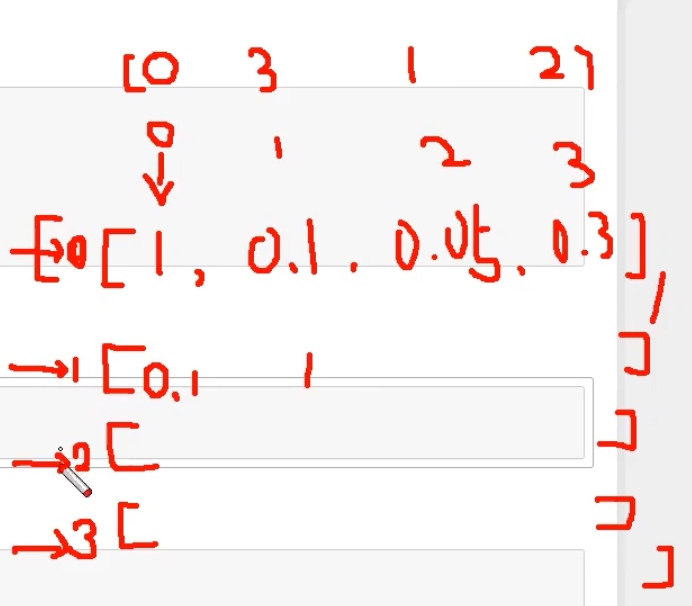

#### **(4) 장르 콘텐츠 필터링을 이용한 영화 추천**

**$ 특정 영화와 장르별 유사도가 높은 영화를 반환하는 함수 생성**

In [18]:
def find_sim_movie(df, sorted_ind, title_name, top_n=10): # title_name : 기준영화, top_n : 기준영화와 유사한 것 = 10개
    
    # 인자로 입력된 movies_df DataFrame에서 'title' 컬럼이 입력된 title_name 값인 DataFrame추출
    title_movie = df[df['title'] == title_name]
    
    # title_named을 가진 DataFrame의 index 객체를 ndarray로 반환하고 
    # sorted_ind 인자로 입력된 genre_sim_sorted_ind 객체에서 유사도 순으로 top_n 개의 index 추출
    title_index = title_movie.index.values
    similar_indexes = sorted_ind[title_index, :(top_n)]
    
    # 추출된 top_n index들 출력. top_n index는 2차원 데이터 임. 
    #dataframe에서 index로 사용하기 위해서 1차원 array로 변경
    print(similar_indexes)
    similar_indexes = similar_indexes.reshape(-1)
    
    return df.iloc[similar_indexes]

In [20]:
similar_movies = find_sim_movie(movies_df, genre_sim_sorted_ind, 'The Godfather',10)

[[2731 1243 3636 1946 2640 4065 1847 4217  883 3866]]


In [21]:
similar_movies[['title', 'vote_average']]

,title,vote_average
2731,The Godfather: Part II,8.3
1243,Mean Streets,7.2
3636,Light Sleeper,5.7
1946,The Bad Lieutenant: Port of Call - New Orleans,6.0
2640,Things to Do in Denver When You're Dead,6.7
4065,Mi America,0.0
1847,GoodFellas,8.2
4217,Kids,6.8
883,Catch Me If You Can,7.7
3866,City of God,8.1


- 해석 : 같은 장르이면서 평점까지 높아야 좋을 것 같다.

**$ 평점이 높은 영화 정보 확인**

In [22]:
movies_df[['title','vote_average','vote_count']].sort_values('vote_average', ascending=False)[:10]

,title,vote_average,vote_count
3519,Stiff Upper Lips,10.0,1
4247,Me You and Five Bucks,10.0,2
4045,"Dancer, Texas Pop. 81",10.0,1
4662,Little Big Top,10.0,1
3992,Sardaarji,9.5,2
2386,One Man's Hero,9.3,2
2970,There Goes My Baby,8.5,2
1881,The Shawshank Redemption,8.5,8205
2796,The Prisoner of Zenda,8.4,11
3337,The Godfather,8.4,5893


- vote_count가 너무 낮으면 신뢰도가 낮음

**$ 평가 횟수에 대한 가중치가 부여된 평점(Weighted Rating) 계산**  

**가중 평점(Weighted Rating) = (v/(v+m)) * R + (m/(v+m)) * C**
         
■ v: 개별 영화에 평점을 투표한 횟수

■ m: 평점을 부여하기 위한 최소 투표 횟수

■ R: 개별 영화에 대한 평균 평점.

■ C: 전체 영화에 대한 평균 평점

- m : 상위 60% 등 투표횟수 

In [23]:
C = movies_df['vote_average'].mean()
m = movies_df['vote_count'].quantile(0.6) # 상위 60% 투표횟수
print('C:',round(C,3), 'm:',round(m,3))

C: 6.092 m: 370.2


- 평균평점 : 6점, 상위 60% 투표횟수 : 370번

In [24]:
percentile = 0.6
m = movies_df['vote_count'].quantile(percentile)
C = movies_df['vote_average'].mean()


# 가중평점을 구하는 함수
def weighted_vote_average(record):
    v = record['vote_count']
    R = record['vote_average']
    
    return ( (v/(v+m)) * R ) + ( (m/(m+v)) * C )   

movies_df['weighted_vote'] = movies_df.apply(weighted_vote_average, axis=1) 


In [25]:
movies_df[['title','vote_average','weighted_vote','vote_count']].sort_values('weighted_vote',
                                                                          ascending=False)[:10]

,title,vote_average,weighted_vote,vote_count
1881,The Shawshank Redemption,8.5,8.396052,8205
3337,The Godfather,8.4,8.263591,5893
662,Fight Club,8.3,8.216455,9413
3232,Pulp Fiction,8.3,8.207102,8428
65,The Dark Knight,8.2,8.136930,12002
1818,Schindler's List,8.3,8.126069,4329
3865,Whiplash,8.3,8.123248,4254
809,Forrest Gump,8.2,8.105954,7927
2294,Spirited Away,8.3,8.105867,3840
2731,The Godfather: Part II,8.3,8.079586,3338


In [26]:
def find_sim_movie(df, sorted_ind, title_name, top_n=10):
    title_movie = df[df['title'] == title_name]
    title_index = title_movie.index.values
    
    # top_n의 2배에 해당하는 쟝르 유사성이 높은 index 추출 
    similar_indexes = sorted_ind[title_index, :(top_n*2)]
    similar_indexes = similar_indexes.reshape(-1)
# 기준 영화 index는 제외
    similar_indexes = similar_indexes[similar_indexes != title_index]
    
    # top_n의 2배에 해당하는 후보군에서 weighted_vote 높은 순으로 top_n 만큼 추출 
    return df.iloc[similar_indexes].sort_values('weighted_vote', ascending=False)[:top_n]

similar_movies = find_sim_movie(movies_df, genre_sim_sorted_ind, 'The Godfather',10)
similar_movies[['title', 'vote_average', 'weighted_vote']]

,title,vote_average,weighted_vote
2731,The Godfather: Part II,8.3,8.079586
1847,GoodFellas,8.2,7.976937
3866,City of God,8.1,7.759693
1663,Once Upon a Time in America,8.2,7.657811
883,Catch Me If You Can,7.7,7.557097
281,American Gangster,7.4,7.141396
4041,This Is England,7.4,6.739664
1149,American Hustle,6.8,6.717525
1243,Mean Streets,7.2,6.626569
2839,Rounders,6.9,6.530427
